### Import Necessary libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### Business Problem
#### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
#### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

#### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

#### Attribute Information:

#### The explanations of sensor measurements and their brief statistics are given below.
#### Variable (Abbr.) Unit Min Max Mean
#### Ambient temperature (AT) C â€“6.23 37.10 17.71
#### Ambient pressure (AP) mbar 985.85 1036.56 1013.07
#### Ambient humidity (AH) (%) 24.08 100.20 77.87
#### Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
#### Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
#### Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
#### Turbine after temperature (TAT) C 511.04 550.61 546.16
#### Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
#### Turbine energy yield (TEY) MWH 100.02 179.50 133.51
#### Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
#### Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

#### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

### Data preparation and description

In [52]:
gasturbine_data = pd.read_csv('gas_turbines.csv')
gasturbine_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [53]:
gasturbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [55]:
gasturbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

<AxesSubplot:xlabel='NOX', ylabel='Density'>

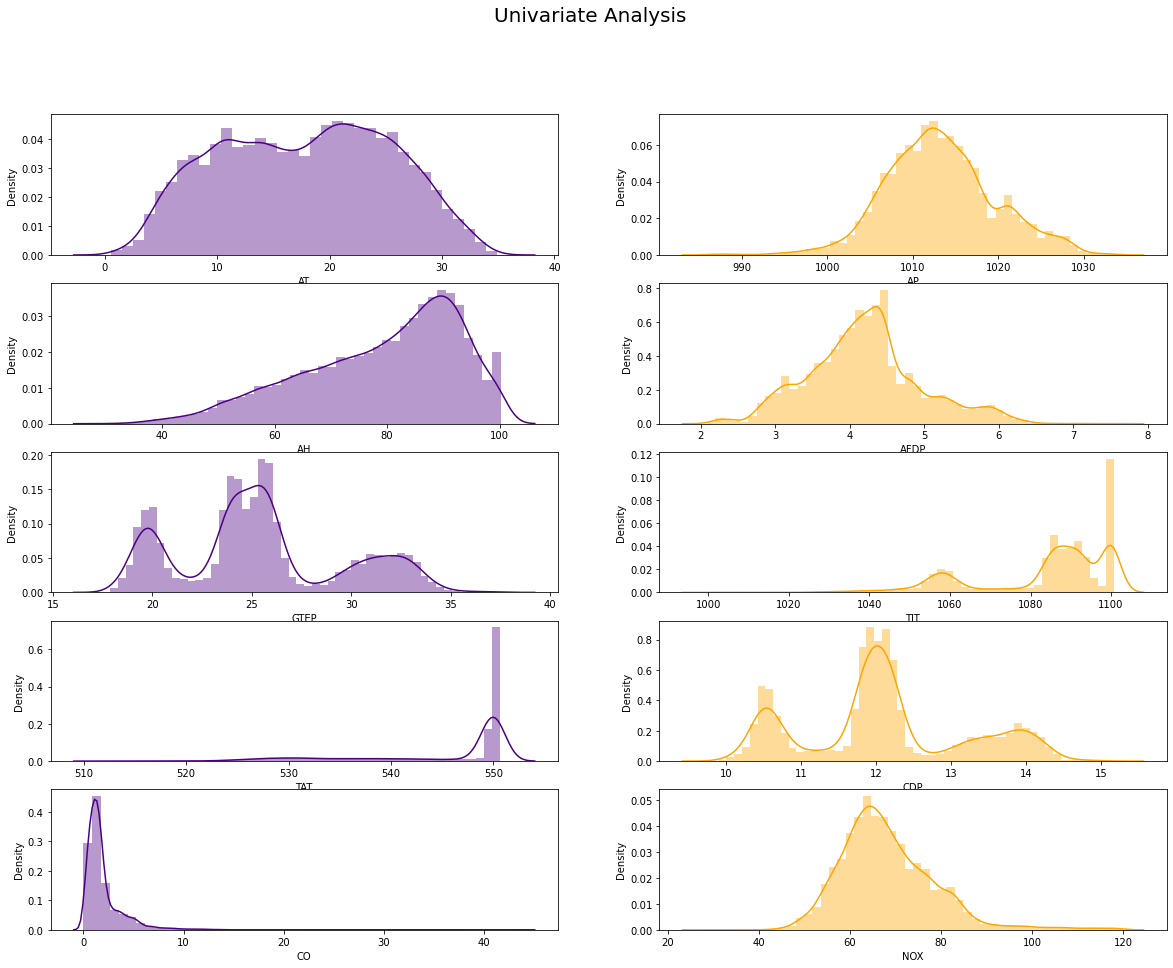

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(gasturbine_data['AT'],ax=axes[0,0],color='indigo')
sns.distplot(gasturbine_data['AP'],ax=axes[0,1],color='orange')
sns.distplot(gasturbine_data['AH'],ax=axes[1,0],color='indigo')
sns.distplot(gasturbine_data['AFDP'],ax=axes[1,1],color='orange')
sns.distplot(gasturbine_data['GTEP'],ax=axes[2,0],color='indigo')
sns.distplot(gasturbine_data['TIT'],ax=axes[2,1],color='orange')
sns.distplot(gasturbine_data['TAT'],ax=axes[3,0],color='indigo')
sns.distplot(gasturbine_data['CDP'],ax=axes[3,1],color='orange')
sns.distplot(gasturbine_data['CO'],ax=axes[4,0],color='indigo')
sns.distplot(gasturbine_data['NOX'],ax=axes[4,1],color='orange')

### Inferences:
 
### 1. Left Skewness :  AH | TIT | TAT
### 2. Right Skewness : AFDP |  CO
### 3. AT | NOX|AP  seems to have normally distribution

<AxesSubplot:xlabel='TEY', ylabel='Density'>

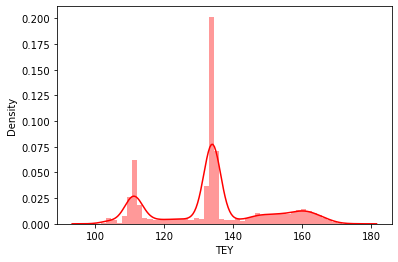

In [31]:
sns.distplot(gasturbine_data['TEY'],color='red')

<AxesSubplot:xlabel='NOX', ylabel='TEY'>

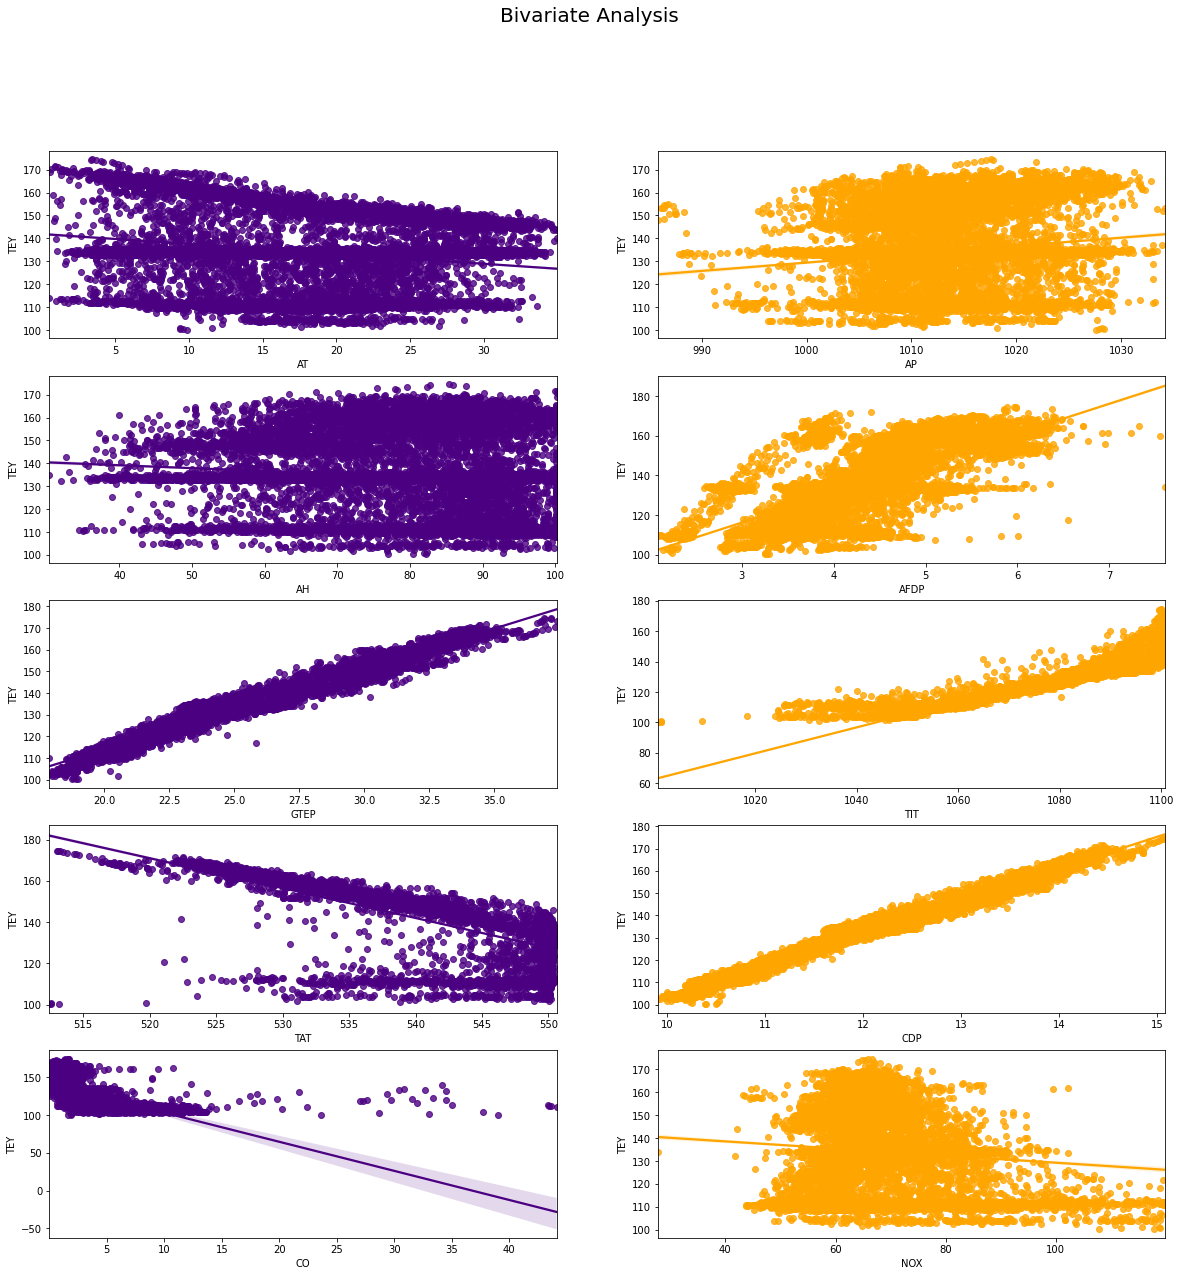

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Bivariate Analysis',fontsize=20)
sns.regplot(x="AT",y="TEY",gasturbine_data=gasturbine_data,ax=axes[0,0],color='indigo')
sns.regplot(x="AP",y="TEY",gasturbine_data=gasturbine_data,ax=axes[0,1],color='orange')
sns.regplot(x="AH",y="TEY",gasturbine_data=gasturbine_data,ax=axes[1,0],color='indigo')
sns.regplot(x="AFDP",y="TEY",gasturbine_data=gasturbine_data,ax=axes[1,1],color='orange')
sns.regplot(x="GTEP",y="TEY",gasturbine_data=gasturbine_data,ax=axes[2,0],color='indigo')
sns.regplot(x="TIT",y="TEY",gasturbine_data=gasturbine_data,ax=axes[2,1],color='orange')
sns.regplot(x="TAT",y="TEY",gasturbine_data=gasturbine_data,ax=axes[3,0],color='indigo')
sns.regplot(x="CDP",y="TEY",gasturbine_data=gasturbine_data,ax=axes[3,1],color='orange')
sns.regplot(x="CO",y="TEY",gasturbine_data=gasturbine_data,ax=axes[4,0],color='indigo')
sns.regplot(x="NOX",y="TEY",gasturbine_data=gasturbine_data,ax=axes[4,1],color='orange')

### Inferences:
 
### 1. GTEP | CDP have a perfect Linear Increasing Relation with TEY
### 2. TIT | AFDP has slight Linear Increasing Relation with TEY
### 3. TAT | CO has slight Linear Decreasing Relation with TEY
###  4. AT | AP | AH | NOX have scattered points all around very less relation

<AxesSubplot:>

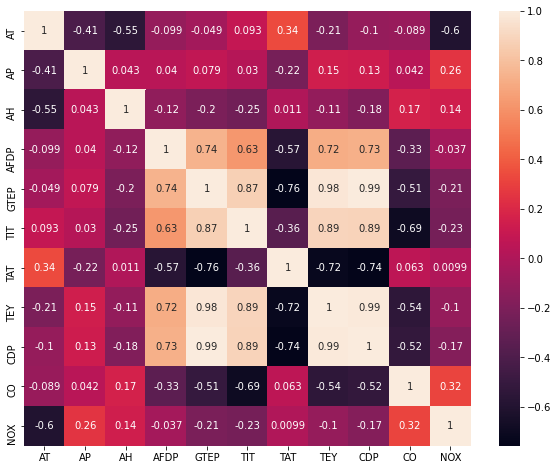

In [33]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(gasturbine_data.corr(),annot=True)

### Defining Independent and Dependent Variables


In [66]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

### 1. K-Fold Cross Validation


In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [68]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [69]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.20 (0.26) MSE


In [70]:
estimator.fit(X, y)
prediction = estimator.predict(X)

In [71]:
prediction

array([-1.4629802, -1.4576653, -1.4504881, ..., -1.4619954, -1.5136843,
       -1.5712357], dtype=float32)

### Applying inverse transform on prediction to bring original values

In [75]:
a=scaler.inverse_transform(prediction)
b=scaler.inverse_transform(y)

In [76]:
#Calculate error of model actual and predicted values
mean_squared_error(b,a)


8.92308346246922

### 2. Using Train-Test Split Model Validation Technique

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [78]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [79]:
prediction

array([ 0.16868046,  0.62051046,  0.83738893, ..., -0.31760976,
        0.8712412 , -0.74484825], dtype=float32)

### Applying inverse transform on prediction to bring original values

In [80]:
c=scaler.inverse_transform(prediction)
d=scaler.inverse_transform(y_test)

In [81]:
mean_squared_error(d,c)

138.18679048246585

In [56]:
seed = 7
numpy.random.seed(seed)

In [57]:
gasturbine_data1 = gasturbine_data.copy()

In [58]:
# split into input (X) and output (Y) variables
X = gasturbine_data1.iloc[:,0:10]
Y = gasturbine_data1.iloc[:,10]
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494


In [59]:
Y

0        82.722
1        82.776
2        82.468
3        82.670
4        82.311
          ...  
15034    79.559
15035    79.917
15036    90.912
15037    93.227
15038    92.498
Name: NOX, Length: 15039, dtype: float64

In [10]:
X_norm = norm_func(X)

In [11]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_norm, Y, epochs=150, batch_size=10)

Epoch 1/150
1504/1504 [==============================] - 3s 2ms/step - loss: -21275.4414 - accuracy: 0.0000e+00
Epoch 2/150
1504/1504 [==============================] - 3s 2ms/step - loss: -249820.1875 - accuracy: 0.0000e+00
Epoch 3/150
1504/1504 [==============================] - 3s 2ms/step - loss: -870769.1250 - accuracy: 0.0000e+00
Epoch 4/150
1504/1504 [==============================] - 3s 2ms/step - loss: -1967576.6250 - accuracy: 0.0000e+00
Epoch 5/150
1504/1504 [==============================] - 3s 2ms/step - loss: -3609205.7500 - accuracy: 0.0000e+00
Epoch 6/150
1504/1504 [==============================] - 4s 2ms/step - loss: -5870100.0000 - accuracy: 0.0000e+00
Epoch 7/150
1504/1504 [==============================] - 4s 2ms/step - loss: -8824158.0000 - accuracy: 0.0000e+00
Epoch 8/150
1504/1504 [==============================] - 3s 2ms/step - loss: -12548430.0000 - accuracy: 0.0000e+00
Epoch 9/150
1504/1504 [==============================] - 3s 2ms/step - loss: -17113402.0000

1504/1504 [==============================] - 3s 2ms/step - loss: -4876881920.0000 - accuracy: 0.0000e+00
Epoch 72/150
1504/1504 [==============================] - 3s 2ms/step - loss: -5075315712.0000 - accuracy: 0.0000e+00
Epoch 73/150
1504/1504 [==============================] - 3s 2ms/step - loss: -5278906368.0000 - accuracy: 0.0000e+00
Epoch 74/150
1504/1504 [==============================] - 3s 2ms/step - loss: -5487984128.0000 - accuracy: 0.0000e+00
Epoch 75/150
1504/1504 [==============================] - 3s 2ms/step - loss: -5702367232.0000 - accuracy: 0.0000e+00
Epoch 76/150
1504/1504 [==============================] - 3s 2ms/step - loss: -5922273792.0000 - accuracy: 0.0000e+00
Epoch 77/150
1504/1504 [==============================] - 3s 2ms/step - loss: -6147767296.0000 - accuracy: 0.0000e+00
Epoch 78/150
1504/1504 [==============================] - 3s 2ms/step - loss: -6378778624.0000 - accuracy: 0.0000e+00
Epoch 79/150
1504/1504 [==============================] - 3s 2ms/step

In [50]:
accuracy = model.evaluate(X, Y)
print('Accuracy:  ' %(accuracy*100))

470/470 [==============================] - 1s 3ms/step - loss: -11890378752.0000 - accuracy: 0.0000e+00
Accuracy:  
